<a href="https://colab.research.google.com/github/nyoons/ESAA/blob/main/2022_11_21_%EA%B3%BC%EC%A0%9C_%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ch 05. 회귀

>**01. 회귀 소개**

데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 기법. 최적의 회귀 계수 찾기.

지도학습의 두 가지 유형은 분류와 회귀. 대표적인 선형 회귀 모델은 다음과 같다.
* 일반 선형 회귀 : RSS 최소화하도록 회귀 계수 최적화. 규제 적용 안함.
* 릿지 : 선형 회귀에 L2규제 추가.
* 라쏘 : 선형 회귀에 L1규제 추가.
* 엘라스틱넷 : L2, L1 규제 결합한 모델. 피처가 많은 데이터 세트.
* 로지스틱 회귀 : 사실 분류에 사용.


>**02. 단순 선형 회귀를 통한 회귀 이해**

단순 선형 회귀는 독립변수도 종속변수도 하나인 선형 회귀. RSS를 최소로 하는 회귀 계수를 학습을 통해 찾는 것이 머신러닝 기반 회귀의 핵심 사항. RSS는 회귀에서 비용이며 회귀 계수 w로 구성되는 RSS를 비용 함수라고 함. 머신러닝 회귀 알고리즘은 데이터를 계속 학습하며 이 비용 함수가 반환하는 오류 값을 지속해서 감소시키고 최종적으로는 더 이상 감소하지 않는 최소의 오류 값을 구하는 것.


>**03. 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개**

어떻게 비용 함수가 최소가 되는 w 파라미터를 구할 수 있을까? 경사 하강법. 반복적으로 비용 함수의 반환 값, 즉 예측값과 실제 값이 차이가 작아지는 방향성을 가지고 W 파라미터를 지속해서 보정해 나간다. 어떻게 하면 오류가 작아지는 방향으로 W 값을 보정할 수 있을까? 미분된 1차 함수의 기울기가 감소하지 않는 지점을 비용 함수가 최소인 지점으로 간주하고 이때의 w 반환. R(w)를 w0, w1로 편미분하여 구해야함.

파이썬 코드로 구현해보자. y=4x+6을 근사하기 위한 100개의 데이터를 만들고 여기에 경사 하강법을 이용해 회귀 계수 w0, w1을 도출할 것.

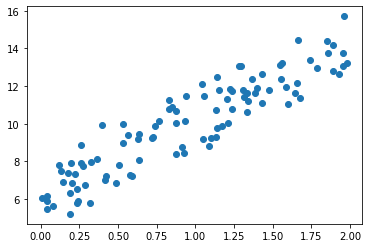

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
#y=4x+6을 근사 (w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦.
x=2*np.random.rand(100,1)
y=6+4*x+np.random.randn(100,1)

#x,y 데이터 세트 산점도로 시각화
plt.scatter(x,y)

데이터가 무작위로 퍼져 있다. 비용 함수 정의해보자. get_cost() 이용.

In [ ]:
def get_cost(y, y_pred):
  N=len(y)
  cost=np.sum(np.square(y-y_pred))/N
  return cost

이제 경사 하강법을 gradient_descent() 함수를 생성해 구현하자. w1, w0을 모두 0으로 초기화 한 뒤, iters 개수만큼 반복하며 w1, w0을 업데이트한다. 

In [ ]:
#w1, w0을 업데이트 할 w1_update, w0_update를 반환.
def get_weight_updates(w1, w0, x, y, learning_rate=0.01):
  N=len(y)
  #먼저 w1_update, w0_update를 각각 w1, w0의 shape과 동일한 크기를 가진 0 값으로 초기화
  w1_update=np.zeros_like(w1)
  w0_update=np.zeros_like(w0)
  #예측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred=np.dot(x, w1.T)+w0
  diff=y-y_pred

  #w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors=np.ones((N,1))
  #w1과 w0을 업데이트할 w1_update와 w0_update를 계산
  w1_update=-(2/N)*learning_rate*(np.dot(x.T, diff))
  w0_update=-(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

  return w1_update, w0_update

get_weight_update를 경사 하강 방식으로 반복적으로 수행하여 w1과 w0를 업데이트 하는 함수를 생성하자.

In [ ]:
#입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함.
def gradient_descent_steps(x,y,iters=10000):
  #w0, w1을 모두 0으로 초기화
  w0=np.zeros((1,1))
  w1=np.zeros((1,1))

  #인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행.
  for ind in range(iters):
    w1_update, w0_update=get_weight_updates(w1, w0, x, y, learning_rate=0.01)
    w1=w1-w1_update
    w0=w0-w0_update

  return w1, w0

이제 gradient_descent_steps() 호출해 w1, w0을 구현해보자. 최종적으로 예측값과 실제값의 RSS 차이를 계산하는 get_cost() 함수를 생성해 경사 하강법의 예측 오류도 계산해보자.

In [ ]:
def get_cost(y, y_pred):
  N=len(y)
  cost=np.sum(np.square(y-y_pred))/N
  return cost

w1, w0=gradient_descent_steps(x,y,iters=10000)
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0], w0[0,0]))
y_pred=w1[0,0]*x+w0
print('Gradinet Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:3.968 w0:6.222
Gradinet Descent Total Cost:0.9924


실제와 비슷! 앞에서 구한 y_pred에 기반해 회귀선도 그려보자.

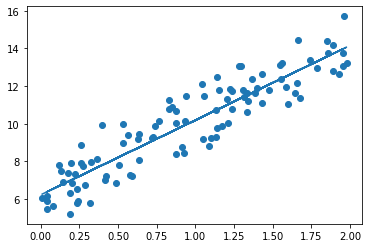

In [ ]:
plt.scatter(x,y)
plt.plot(x, y_pred)

회귀선이 잘 만들어졌다. 경사하강법은 모든 학습 데이터에 대해 반복적으로 업데이터하기 때문에 시간이 오래 걸림. 그래서 실전에서는 대부분 확률적 경사하강법 사용. 확률적 경사 하강법을 함수로 구현해보자. 전체 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 이를 기반으로 계산한다는 차이가 있음.

In [ ]:
def stochastic_gradient_descent_steps(x,y, batch_size=10, iters=10000):
  w0=np.zeros((1,1))
  w1=np.zeros((1,1))
  prev_cost=100000
  iter_index=0

  for ind in range(iters):
    np.random.seed(ind)
    #전체 x,y 데이터에서 랜덤하게 batch_size 만큼 데이터 추출해 sample_x, sample_y 지정
    stochastic_random_index=np.random.permutation(x.shape[0])
    sample_x=x[stochastic_random_index[0:batch_size]]
    sample_y=y[stochastic_random_index[0:batch_size]]
    #랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
    w1_update, w0_update=get_weight_updates(w1, w0, sample_x, sample_y, learning_rate=0.01)
    w1=w1-w1_update
    w0=w0-w0_update

  return w1, w0

w1, w0 및 예측 오류 비용을 계산해보자.

In [ ]:
w1, w0=stochastic_gradient_descent_steps(x,y,iters=10000)
print('w1:', round(w1[0,0], 3), 'w0:', round(w0[0,0], 3))
y_pred=w1[0,0]*x+w0
print('stochastic gradient descent total cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 3.988 w0: 6.244
stochastic gradient descent total cost:0.9942


큰 차이 없음. 큰 데이터 처리 시 확률적 경사 하강법 사용하자. 

지금까지는 단순 선형 회귀. 피처가 여러개인 경우는? 확장하여 사용.


>**05. 다항 회귀와 과(대)적합/과소적합 이해**

**다항 회귀 이해**

회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식 같은 다항식으로 표현되는 것. 그래도 선형회귀다! 사이킷런은 다항 회귀를 위한 클래스를 제공하지는 않음. 하지만 다항 회귀 역시 선형회귀라서 비선형 함수를 선형 모델에 적용시키는 방법을 사용해 구현.

사이킷런의 polynomialFeatures 클래스를 통해 피처를 polynomial(다항식)으로 변환.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

#다항식으로 변환한 단항식 생성, [[0,1], [2,3]]의 2*2 행렬 생성
x=np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n', x)

#degree=2인 2차 다항식으로 변환하기 위해 polynomialfeatures를 이용해 변환
poly=PolynomialFeatures(degree=2)
poly.fit(x)
poly_ftr=poly.transform(x)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


단항 계수 피처를 2차 다항 계수로 변경함. 이렇게 변환된 피처에 선형 회귀를 적용해 다항 회귀를 구현.

3차 다항 회귀 함수를 임의로 설정하고 이의 회귀 계수를 예측할 것.

In [ ]:
def polynomial_func(x):
  y=1+2*x[:, 0]+3*x[:,0]**2+4*x[:,1]**3
  return y

x=np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n', x)
y=polynomial_func(x)
print('삼차 다항식 결정값:\n', y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 다항식 결정값:
 [  5 125]


In [ ]:
from sklearn.linear_model import LinearRegression

#3차 다항식 변환
poly_ftr=PolynomialFeatures(degree=3).fit_transform(x)
print('3차 다항식 계수 feature:\n', poly_ftr)

#Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model=LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_,2))
print('Polynomial 회귀 shape :', model.coef_.shape)

3차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 shape : (10,)


일차 단항식 계수 피처는 2개였지만 3차 다항식 변환 이후에는 10개로 늘어남. 원래 다항식 계수 값인 [1,2,0,3,0,0,0,0,0,4]와 근사하고 있음.

별도로 하는 것보단 사이킷런의 pipeline 객체를 이용해 한번에 다항 회귀를 구현하는 것이 더 명료.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(x):
  y=1 + 2*x[:,0] + 3*x[:,0]**2 + 4*x[:,1]**3
  return y

#pipeline 객체로 streamline하게 polynomial feature 변환과 linear regression을 연결
model=Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression())])
x=np.arange(4).reshape(2,2)
y=polynomial_func(x)

model=model.fit(x,y)

print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


**다항 회귀를 이용한 과소적합 및 과적합 이해**

다항 회귀는 직선적 관계가 아닌 복잡한 다항 관계 모델링 가능. 하지만 차수를 높일수록 학습 데이터에만 너무 맞춘 학습이 이루어져 정작 테스트 데이터 환경에서는 오히려 예측 정확도 떨어진다. =과적합. 

다항 회귀를 이용한 과소적합과 과적합 문제 예시 보자. 학습 데이터는 30개의 임의의 데이터인 x, 그리고 x의 코사인 값에서 약간의 잡음 변동 값을 더한 target인 y로 구성.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

#임의의 값으로 구성된 x값에 대해 코사인 변환 값을 반환.
def true_fun(x):
  return np.cos(1.5*np.pi*x)

#x는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples=30
x=np.sort(np.random.rand(n_samples))

#y값은 코사인 기반의 true_fun에서 약간의 노이즈 변동 값을 더한 값
y=true_fun(x)+np.random.randn(n_samples)*0.1

이제 예측 결과를 비교할 다항식 차수를 1,4,15로 변경하며 예측 결과 비교하자.

세 가지 그래프가 나온다.
Degree 15의 회귀 계수를 살펴보면 매우 크다. 복잡한 다항식을 만족하기 위해 계산된 회귀 계수는 결국 현실과 너무 동떨어짐. 좋은 예측 모델은 지나치게 단순화한 과소적합 모델도, 지나치게 복잡한 과적합 모델도 아닌 균형잡힌 모델이다.

**편향-분산 트레이드 오프**

고편향과 고분산. 편향과 분산은 한 쪽이 높아지면 한 쪽은 낮아진다. 하지만 편향이나 분산 둘 중 하나가 너무 높으면 전체오류가 높아 예측 성능이 저하된다. 높은 편향/낮은 분산에서 과소적합 되기 쉬우며 높은 분산/낮은 편향에서 과적합 되기 쉽다. 서로 트레이드 오프 이루며 오류 cost 값이 최대로 낮아지는 모델을 구하는 것이 가장 효율적이다.
